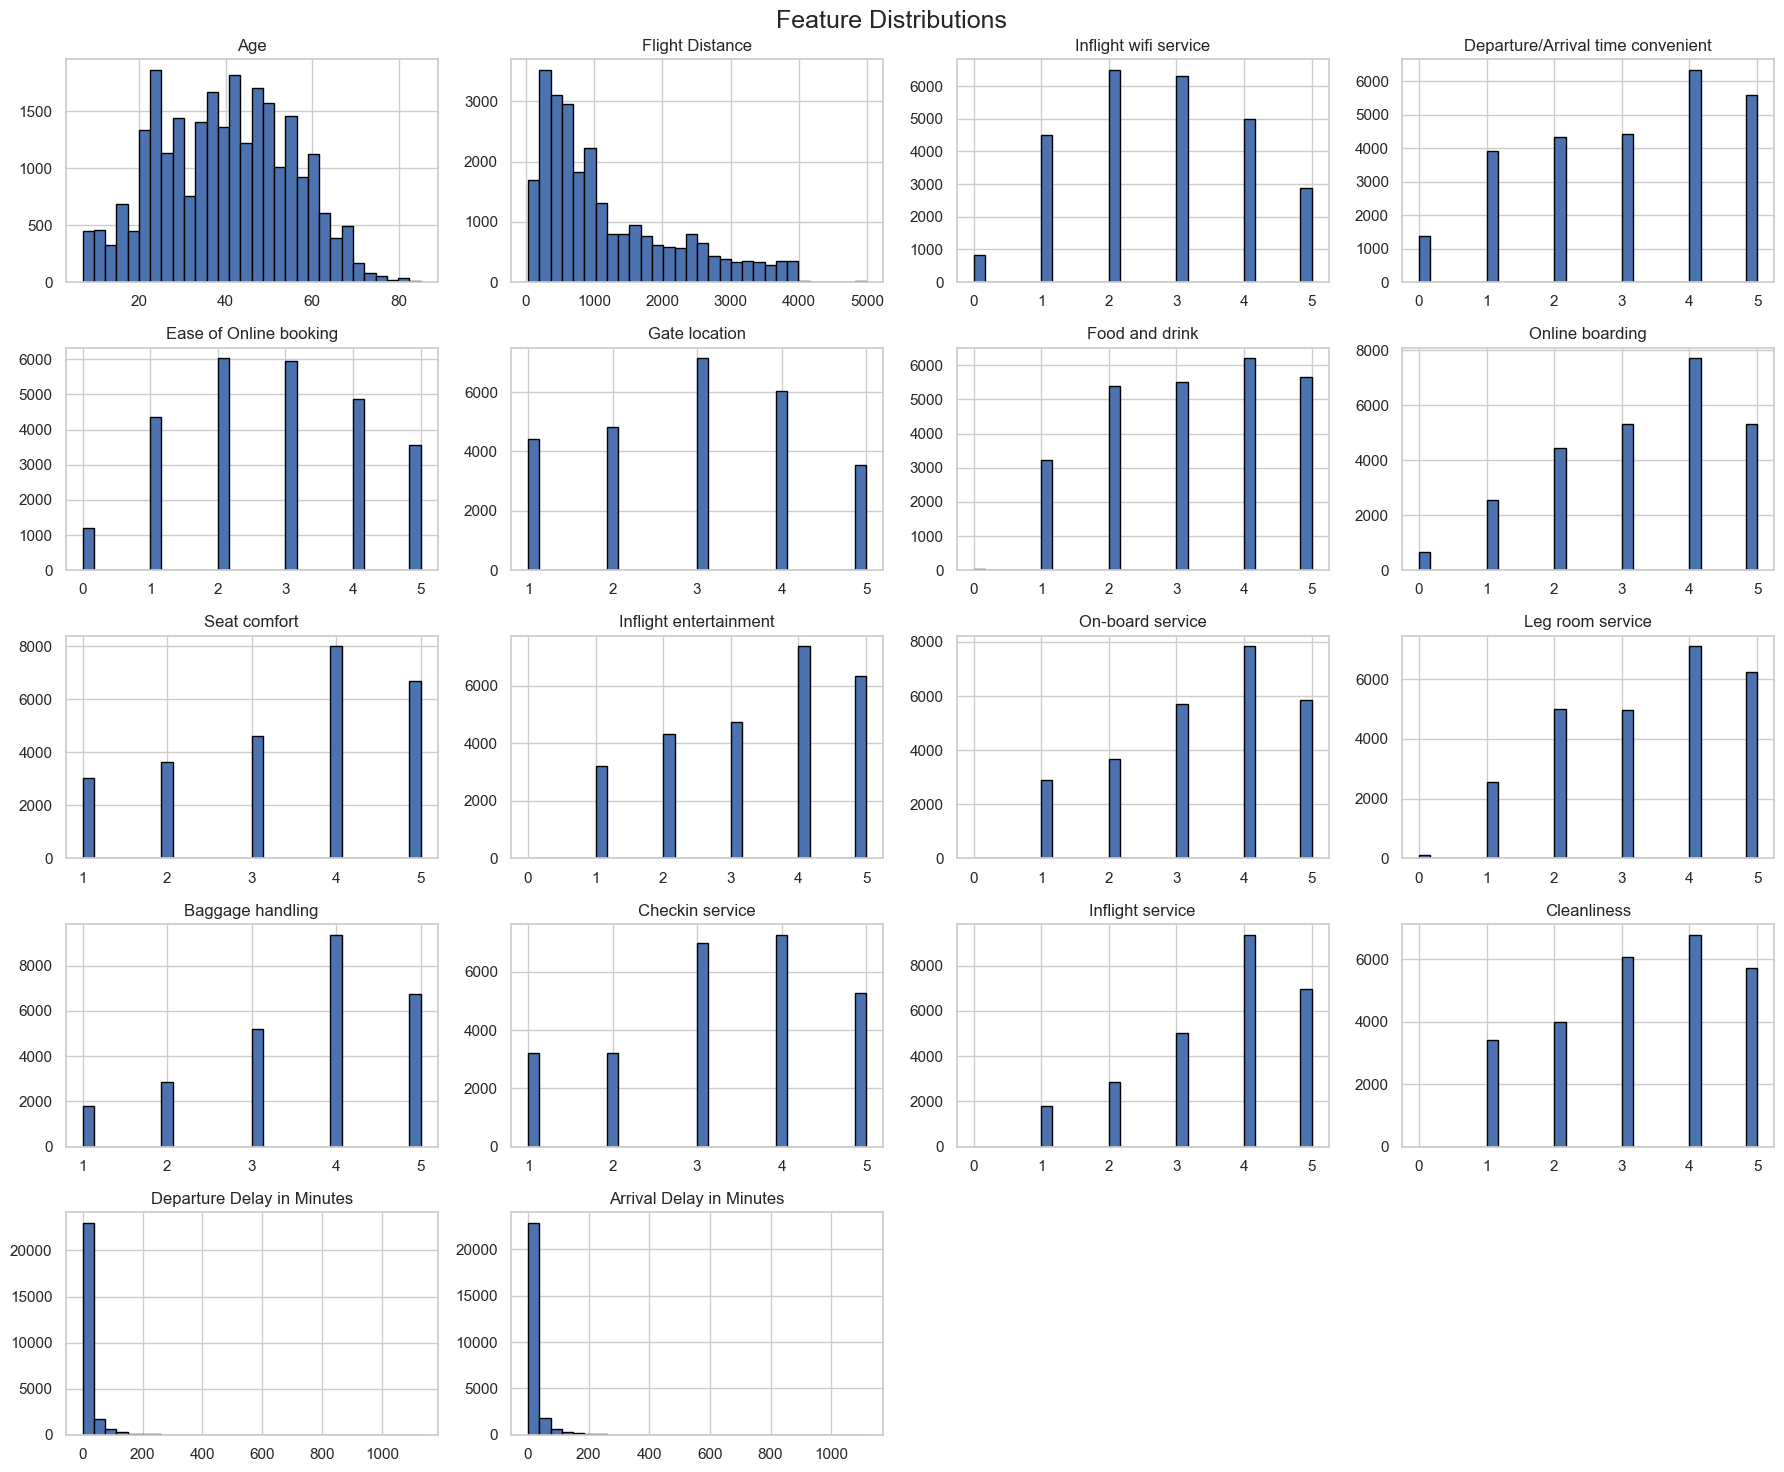

In [28]:
#plot individual features to understand distribution (using histograms)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessed data 
df_new = pd.read_csv("processed_data.csv")

numeric_features = [
    "Age",
    "Flight Distance",
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness",
    "Departure Delay in Minutes",
    "Arrival Delay in Minutes"
]

sns.set(style="whitegrid")

# plot histograms
df_new[numeric_features].hist(
    bins=30,
    figsize=(18, 15),
    edgecolor='black'
)

plt.suptitle("Feature Distributions", fontsize=18)
plt.tight_layout()
plt.show()

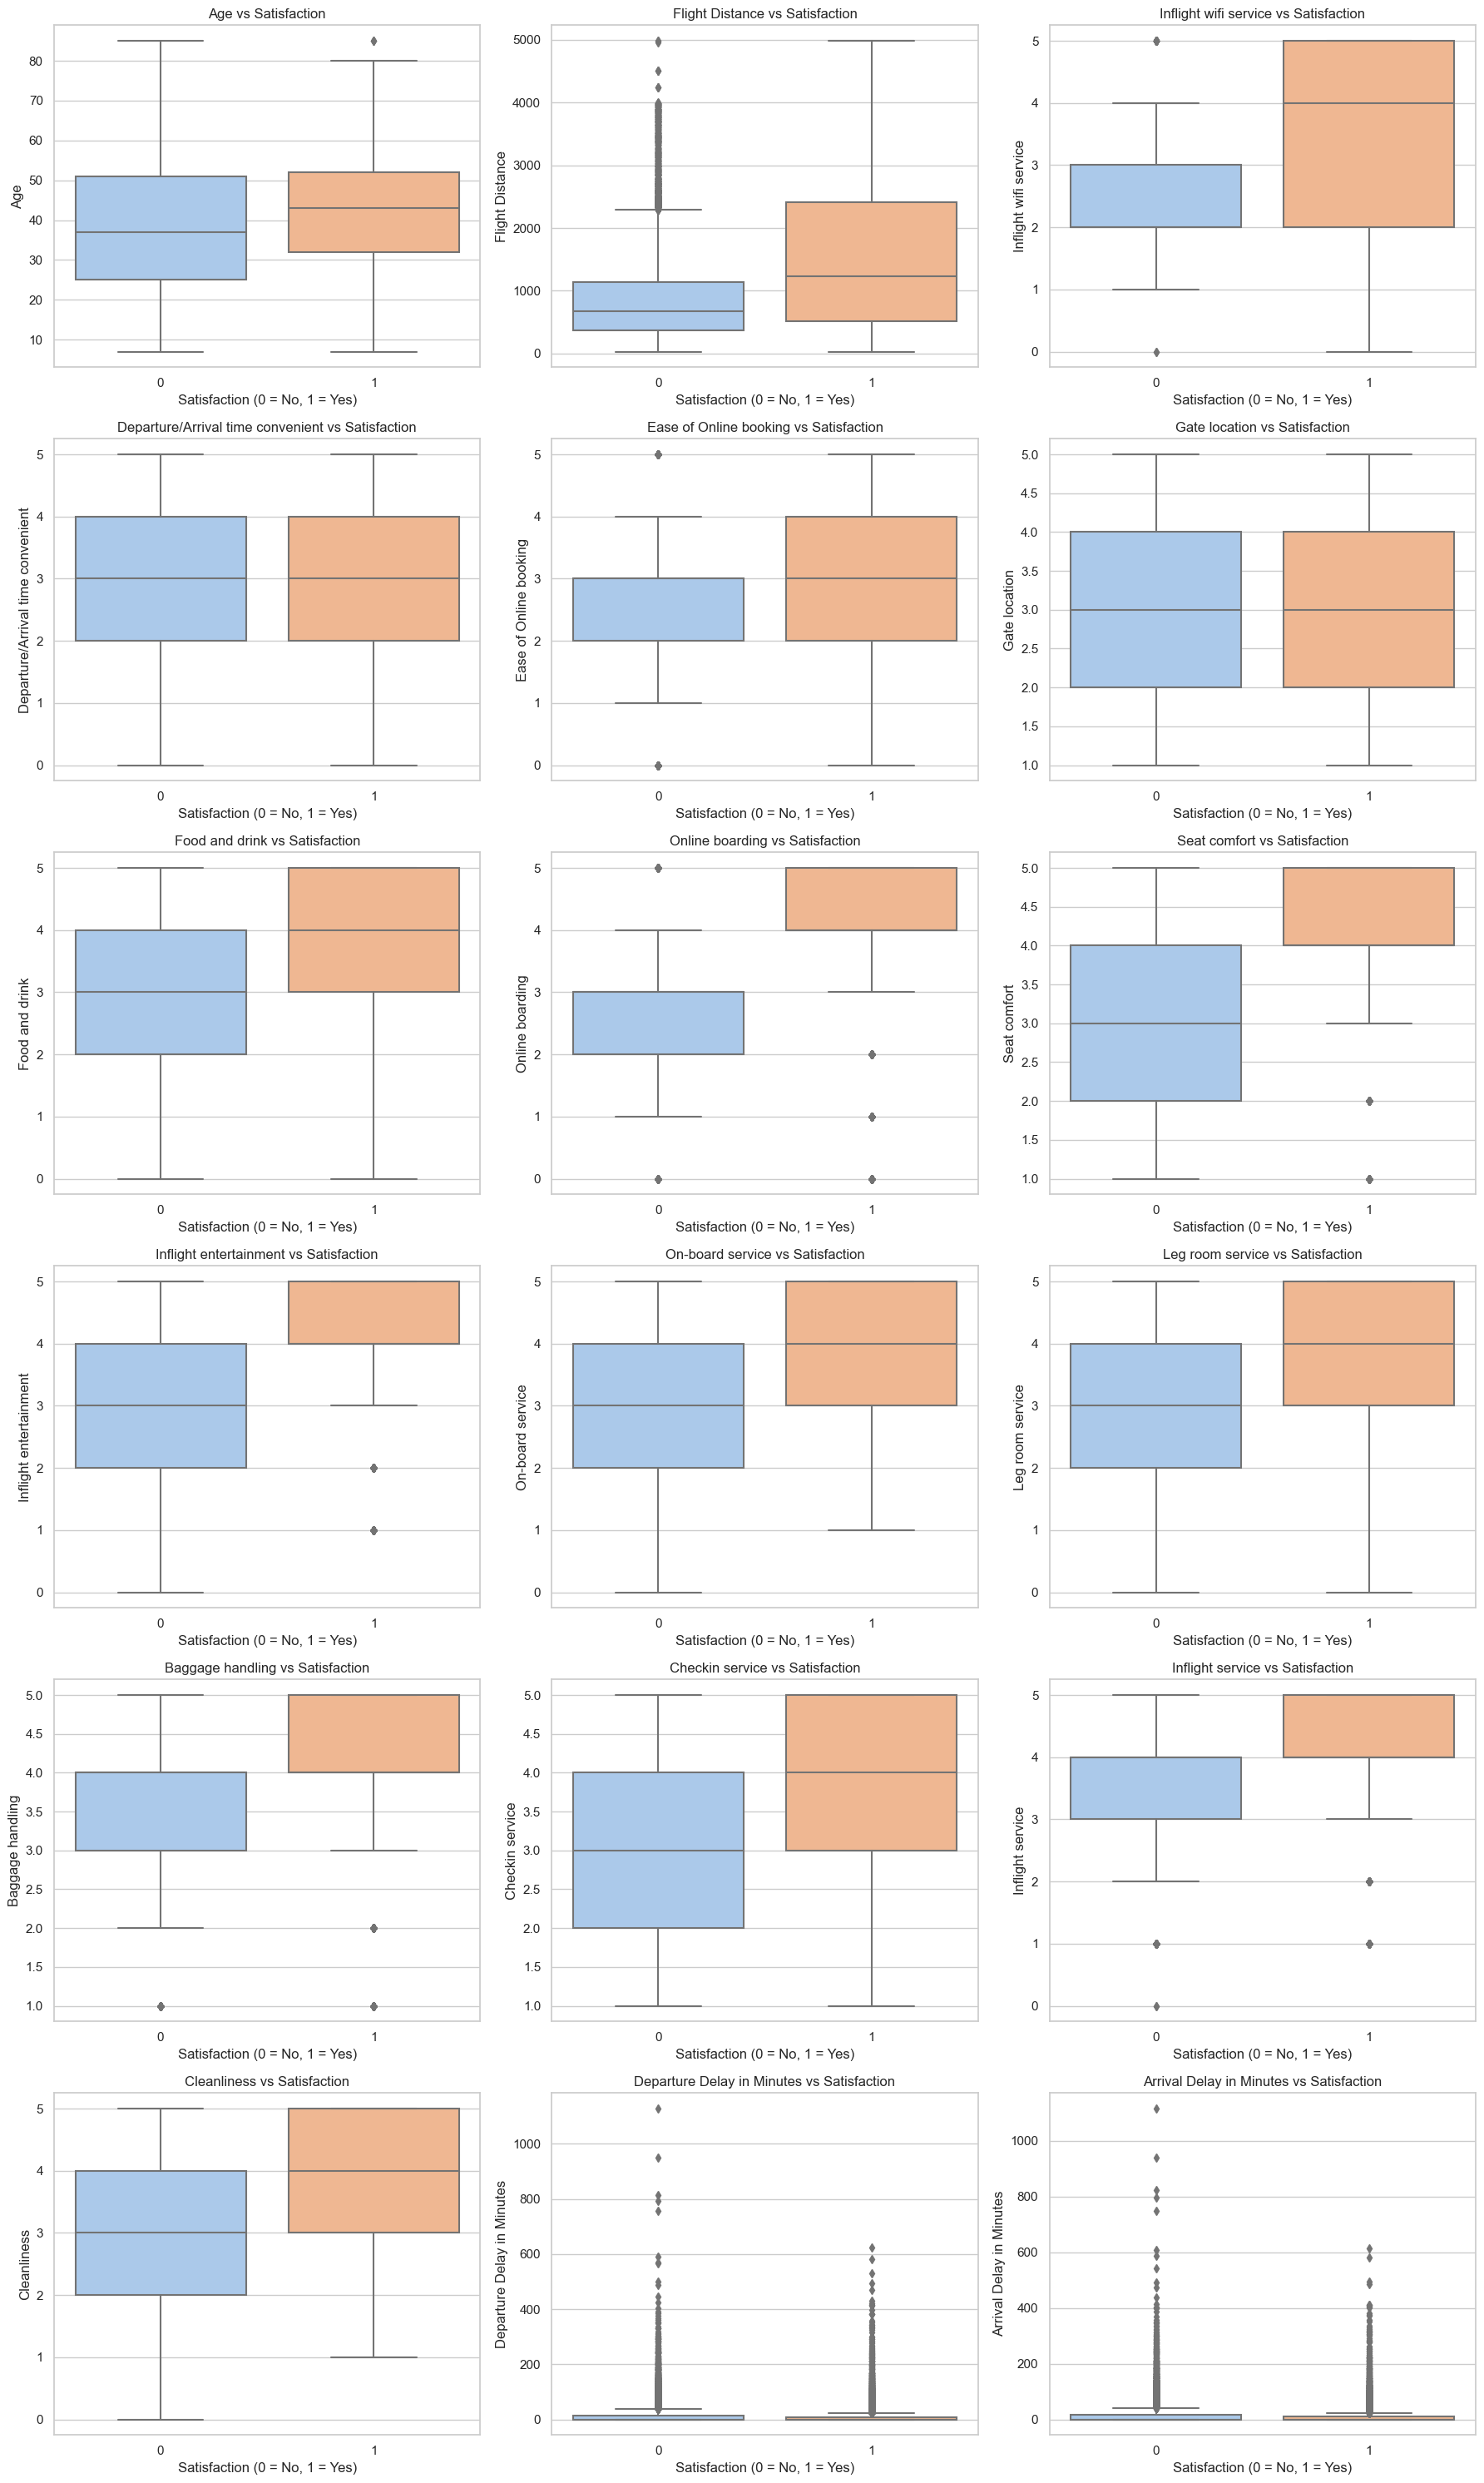

In [29]:
# 3 plots per row layout
plots_per_row = 3
num_rows = math.ceil(len(numeric_features) / plots_per_row)

plt.figure(figsize=(6 * plots_per_row, 5 * num_rows))

# box plot for each feature vs. satisfaction 
for i, feature in enumerate(numeric_features):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.boxplot(x="satisfaction", y=feature, data=df_new, palette="pastel")
    plt.title(f"{feature} vs Satisfaction")
    plt.xlabel("Satisfaction (0 = No, 1 = Yes)")

plt.tight_layout()
plt.show()

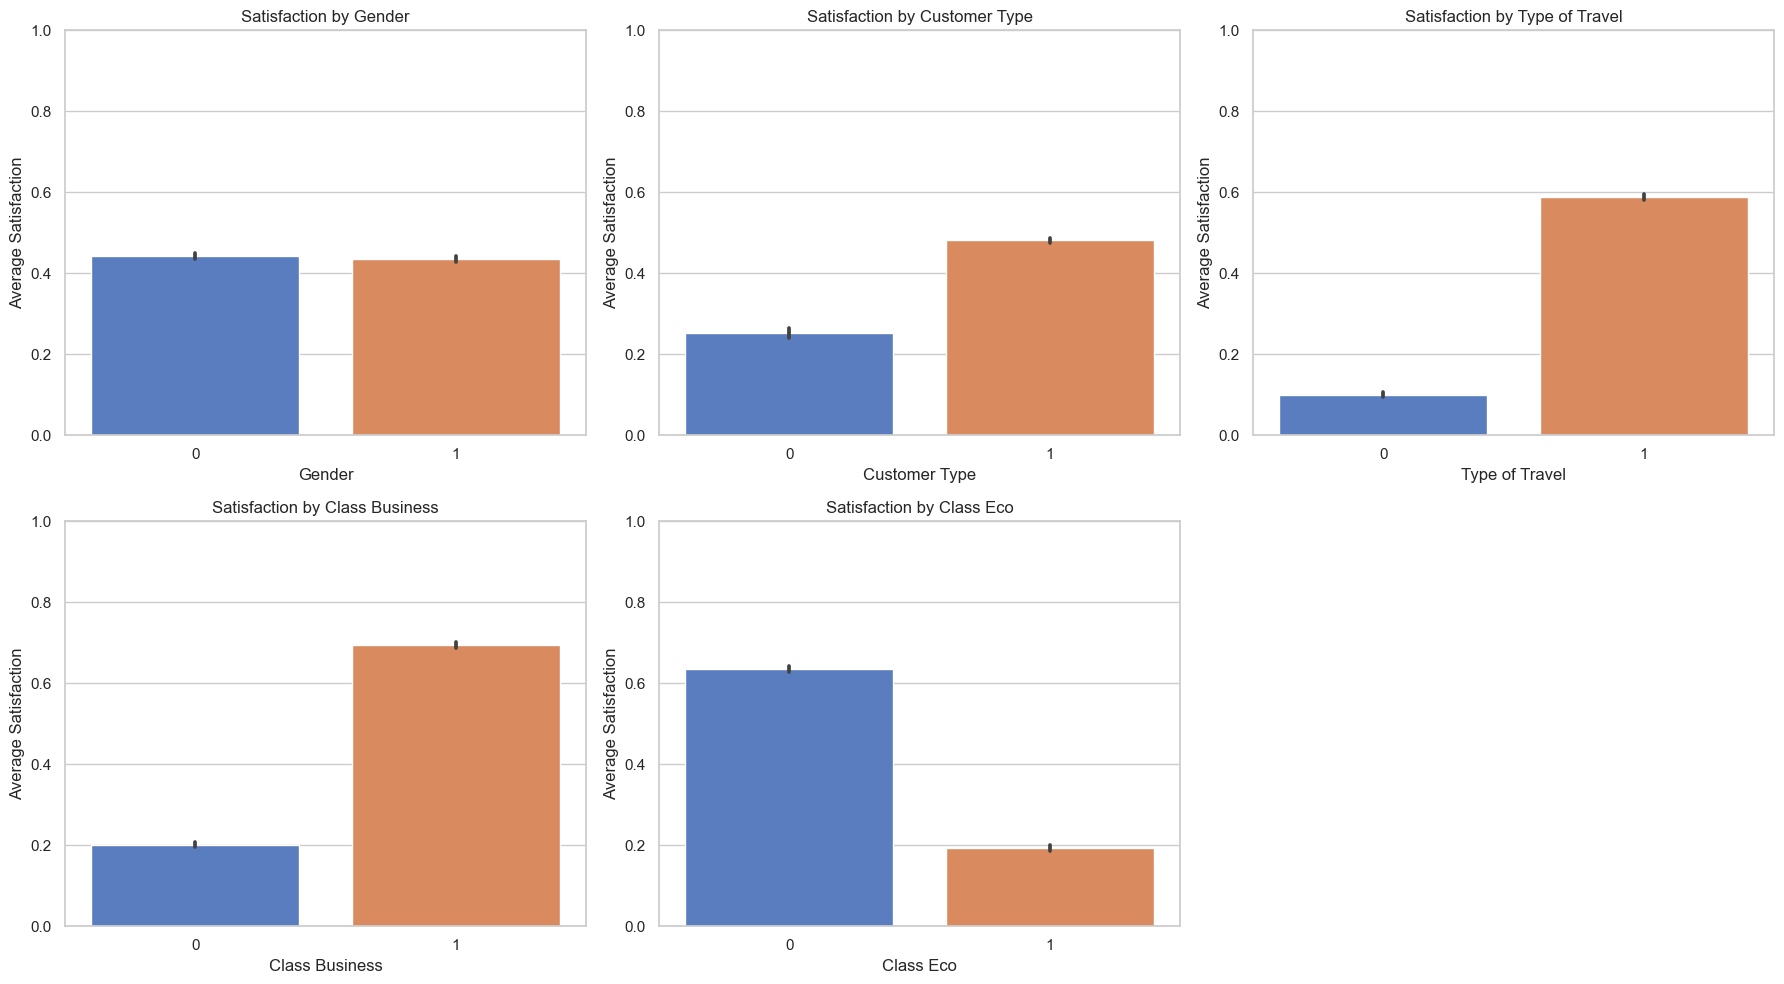

In [30]:
#categorical features
categorical_features = ["Gender", "Customer Type", "Type of Travel", "Class Business", "Class Eco"]

plots_per_row = 3
num_rows = math.ceil(len(categorical_features) / plots_per_row)

plt.figure(figsize=(6 * plots_per_row, 5 * num_rows))

for i, feature in enumerate(categorical_features):
    plt.subplot(num_rows, plots_per_row, i + 1)
    sns.barplot(x=feature, y="satisfaction", data=df_new, palette="muted")
    plt.title(f"Satisfaction by {feature}")
    plt.ylim(0, 1)
    plt.xlabel(feature)
    plt.ylabel("Average Satisfaction")

plt.tight_layout()
plt.show()

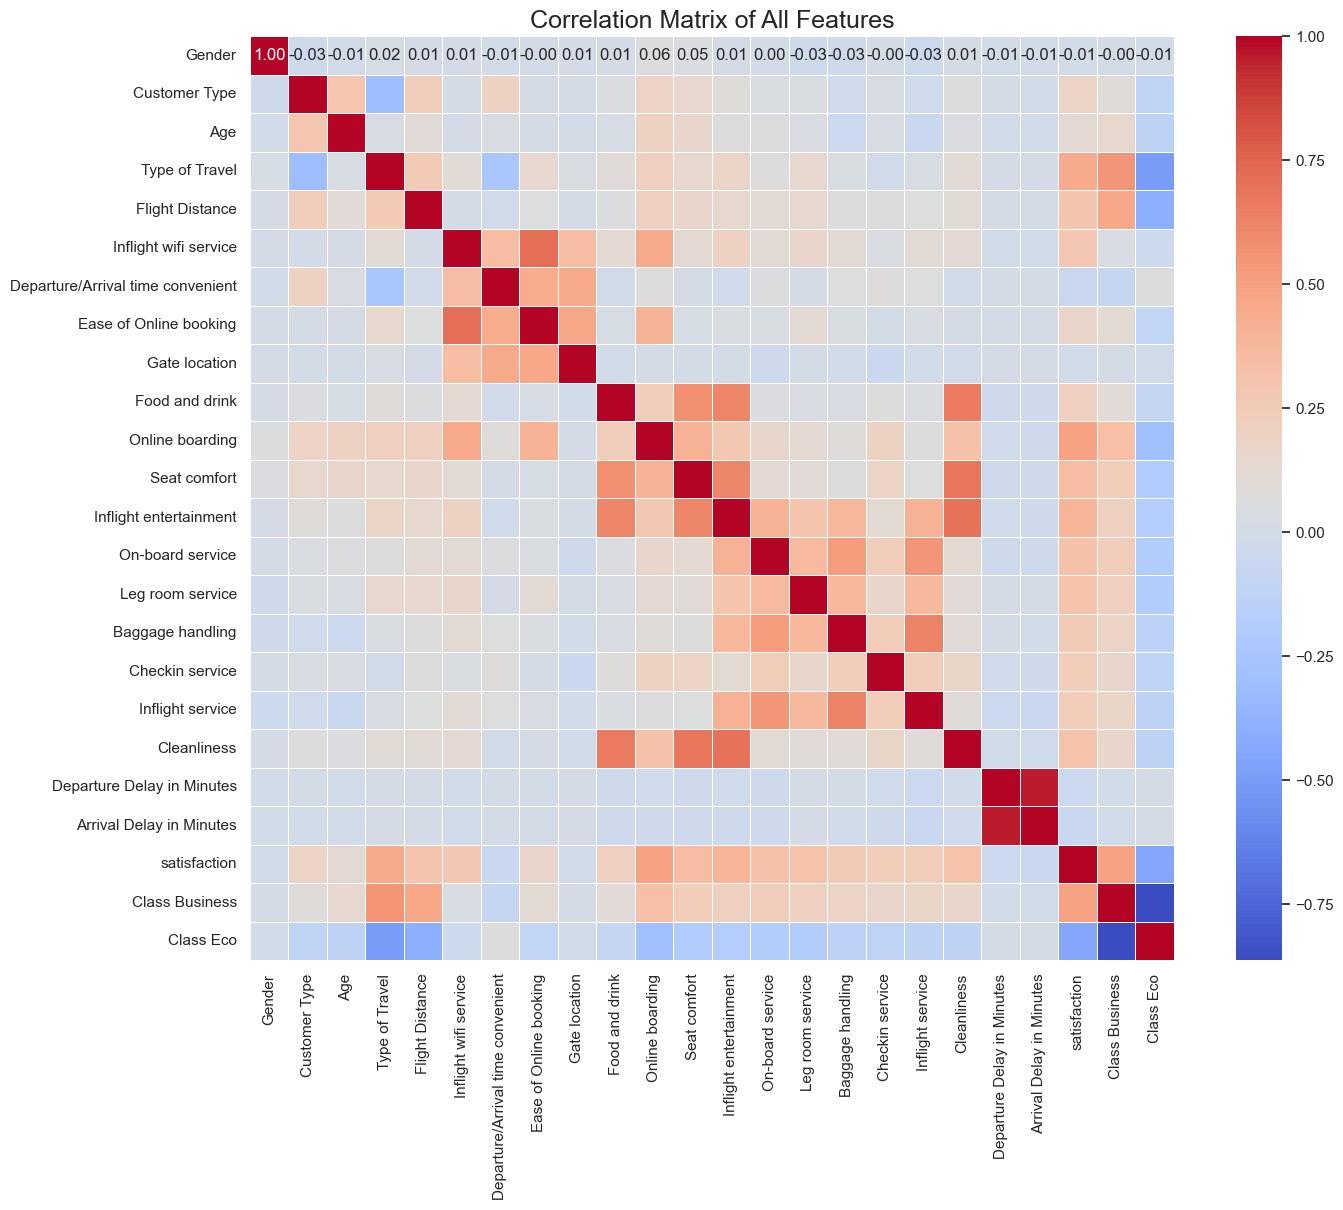

In [31]:
# compute correlation between all numeric features
corr = df_new.corr()

# heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix of All Features", fontsize=18)
plt.show()

In [32]:
# gets all correlations between features and sat. except itself 
s_corr = corr["satisfaction"].drop("satisfaction")  

# sort in descending order and format as df 
corr_df = s_corr.sort_values(ascending=False).reset_index()
corr_df.columns = ["Feature", "Correlation with Satisfaction"]

print(corr_df)

                              Feature  Correlation with Satisfaction
0                      Class Business                       0.496974
1                     Online boarding                       0.494526
2                      Type of Travel                       0.453268
3              Inflight entertainment                       0.398951
4                        Seat comfort                       0.346275
5                    On-board service                       0.321491
6                         Cleanliness                       0.314350
7                    Leg room service                       0.309629
8                     Flight Distance                       0.295292
9               Inflight wifi service                       0.280395
10                   Baggage handling                       0.252415
11                   Inflight service                       0.245573
12                    Checkin service                       0.241495
13                     Food and dr

In [33]:
import numpy as np 

# get correlation matrix
corr_matrix = df_new.corr()

# reset features comparing with itself 
np.fill_diagonal(corr_matrix.values, np.nan)

corr_pairs = corr_matrix.unstack() # unstack matrix from 2D to 1D
corr_pairs = corr_pairs.dropna() # remove any pairs where correlation is NaN

# removes duplicate feature comparsion 
corr_pairs.index = [tuple(sorted(pair)) for pair in corr_pairs.index]
corr_pairs = corr_pairs[~corr_pairs.index.duplicated(keep='first')]

# sort by correlation value
sorted_corr = corr_pairs.sort_values()

print("Top 10 Most Negative Correlations:\n")
print(sorted_corr.head(10))

print("\nTop 10 Most Positive Correlations:\n")
print(sorted_corr.tail(10))

Top 10 Most Negative Correlations:

(Class Business, Class Eco)                           -0.862381
(Class Eco, Type of Travel)                           -0.501629
(Class Eco, satisfaction)                             -0.442417
(Class Eco, Flight Distance)                          -0.401418
(Customer Type, Type of Travel)                       -0.307827
(Class Eco, Online boarding)                          -0.290864
(Departure/Arrival time convenient, Type of Travel)   -0.246425
(Class Eco, Seat comfort)                             -0.200439
(Class Eco, On-board service)                         -0.187651
(Class Eco, Leg room service)                         -0.186268
dtype: float64

Top 10 Most Positive Correlations:

(Inflight service, On-board service)                      0.554734
(Food and drink, Seat comfort)                            0.580970
(Inflight entertainment, Seat comfort)                    0.616817
(Food and drink, Inflight entertainment)                  0.627265
(Bag

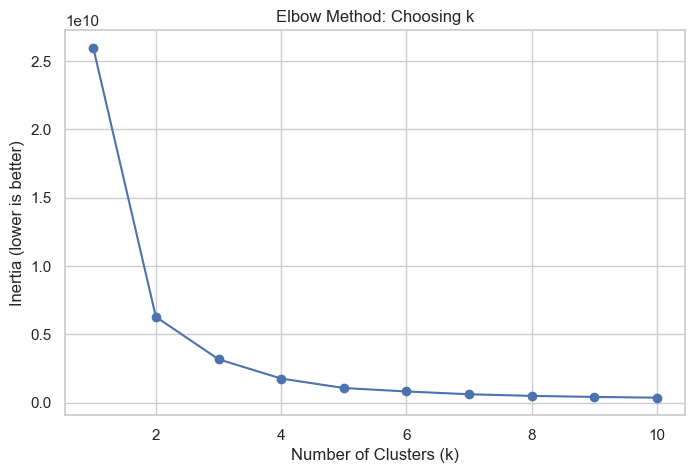

In [34]:
#explore pattern or structure in the data using clustering and dimensionality (PCA)
#clustering: K-Means Clustering with Elbow Method 
# trying to find the value of k that gives clusters without overfitting 

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

x = df_new.drop(columns=["satisfaction"]) # since clustering is unsupervised 
inertia = []  # how tight each cluster is at that k 

# apply elbow method for 10 clusters 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method: Choosing k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (lower is better)")
plt.grid(True)
plt.show()

In [35]:
# make a copy (to avoid modifying the original)
x = df_new.drop(columns=["satisfaction"]).copy()

# fit KMeans with k=4 and assign cluster labels
# choosing 4 becuase that is the elbow (change slows down after 4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
x["cluster"] = kmeans.fit_predict(x) # predicts which cluster each row belongs to and saves it

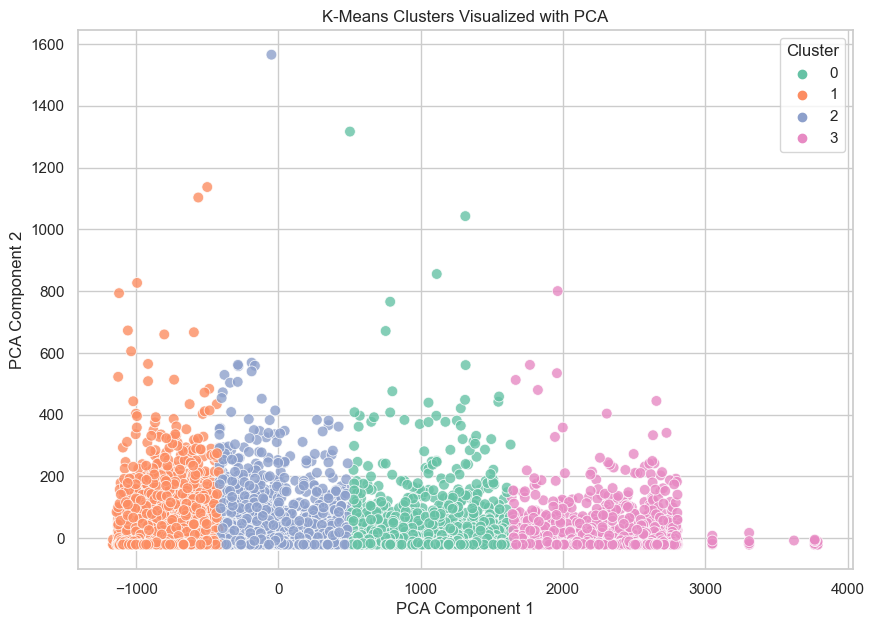

In [36]:
from sklearn.decomposition import PCA

features = x.drop(columns=["cluster"]) # we want to only learn from the features 

#dimensionlity reduction -> shrink it down to 2 features (captures all important information of features) 
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)

# add to df 
x["PCA1"] = pca_components[:, 0] # all rows, column 0 
x["PCA2"] = pca_components[:, 1] # all rows, columnn 1 

# plot the clusters in 2D
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=x,
    x="PCA1", y="PCA2",      # x and y axes
    hue="cluster",           # color by cluster
    palette="Set2",          
    s=60, alpha=0.8          # dot size and transparency
)
plt.title("K-Means Clusters Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# each dot = one person (one row)
# dot's position = based on PCA reduced features 
# dot's color = what cluster it is in 

After applying K-Means clustering with k=4, we used PCA to reduce the dataset to 2 dimensions for visualization.
The scatterplot shows that the four clusters are mostly distinct, especially along the first principal component.
There are some outliers vertically, most points are bunched near the bottom meaning PCA Component 2 is less important in distinguishing the clusters. 


In [37]:
x = df_new.drop(columns=["satisfaction"])

# run PCA
pca = PCA(n_components=2)
pca.fit(x)

# display feature contributions to PCA1
pca_components = pd.DataFrame(pca.components_, columns=x.columns, index=["PCA1", "PCA2"])
pca1_sorted = pca_components.T.sort_values("PCA1", ascending=False)
print(pca1_sorted.head(10))  # top 10 features that contribute to PCA1


                                PCA1      PCA2
Flight Distance             0.999999 -0.000091
Age                         0.001507 -0.001926
Online boarding             0.000291 -0.000627
Class Business              0.000233 -0.000128
Seat comfort                0.000210 -0.000792
Inflight entertainment      0.000184 -0.000698
Leg room service            0.000181  0.000307
On-board service            0.000151 -0.000736
Cleanliness                 0.000139 -0.000466
Departure Delay in Minutes  0.000129  0.706761


K-Means clustering with k=4 revealed distinct groups of passengers based on travel experience. 
PCA showed that the first principal component was almost entirely driven by Flight Distance, while the second was influenced by Departure Delay. 